In [1]:
import os 
import cv2
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
# orb = cv2.ORB_create()
sift = cv2.SIFT_create()

In [3]:
path = "data/"

In [4]:
data = []
gestures = []
best_matches = 0 
for folder in os.listdir(path):
    descriptor_list = []
    for img_path in os.listdir(path + folder):
        currpath = path + folder + '/' + img_path
        # print(currpath)
        img = cv2.imread(currpath)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        processed_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        processed_img = cv2.medianBlur(processed_img, 3)
        processed_img = cv2.equalizeHist(processed_img)
        img_keypoint, img_descriptor = sift.detectAndCompute(processed_img, None)
        img_descriptor = np.float32(img_descriptor)
        if img_descriptor is not None: 
            descriptor_list.append(img_descriptor)
    gestures.append((folder, np.vstack(descriptor_list)))
    
     

In [5]:
clusters = 50

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

all_descriptors = np.vstack([gesture[1] for gesture in gestures])
kmeans = KMeans(n_clusters=clusters, random_state=42)
kmeans.fit(all_descriptors)

KMeans(n_clusters=50, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier



# Prepare data for the classifier
X = []
y = []

for gesture_id, descriptors in gestures:
    histogram = np.zeros(clusters)
    cluster_assignments = kmeans.predict(descriptors)
    for cluster_id in cluster_assignments:
        histogram[cluster_id] += 1
    X.append(histogram)
    y.append(int(gesture_id))
    
    
    # for descriptor in descriptors:
    #     X.append(descriptor)
    #     y.append(int(gesture_id))

X = np.array(X, dtype=np.float32) 
y = np.array(y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X, y)


RandomForestClassifier(random_state=42)

In [8]:
gesture_mapping = {0: 'A', 1: 'B', 2: 'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'K', 10:'L', 11:'M', 12:'N', 13:'O', 14:'P', 15:'Q', 16:'R', 17:'S', 18:'T', 19:'U', 20:'V', 21:'W', 22:"X", 23:'Y', 24:'1', 25:'2', 26:'3', 27:'4', 28:'5', 29:'6', 30:'7', 31:'8', 32: '9'}

In [9]:
img_list = []
img_label = []

test_path = 'test/'
for label in os.listdir(test_path):
    for name in os.listdir(test_path + label):
        img_list.append(cv2.imread(test_path + label + '/' + name))
        img_label.append(gesture_mapping[int(label)])


In [10]:
def acc_test(image):
    target = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    process_target = cv2.cvtColor(target, cv2.COLOR_RGB2GRAY)
    process_target = cv2.medianBlur(process_target, 3)
    process_target = cv2.equalizeHist(process_target)
    keypoints, descriptors = sift.detectAndCompute(process_target, None)
    descriptors = np.float32(descriptors)

    if descriptors is not None:
        histogram = np.zeros(clusters)
        cluster_assignments = kmeans.predict(descriptors)
        for cluster_id in cluster_assignments: 
            histogram[cluster_id] += 1
        histogram = scaler.transform([histogram])
        prediction = model.predict(histogram)
        return prediction[0]
        # predictions = model.predict(descriptors)
        # gesture = np.bincount(predictions).argmax()  # Get the most common gesture prediction
        # return gesture
    else:
        return "No keypoints found"
    

In [11]:
img_predict = []
for test in img_list:
    recognized_gesture= acc_test(test)
    img_predict.append(gesture_mapping[recognized_gesture])

In [12]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(img_label, img_predict)
print(accuracy)

0.030303030303030304


In [13]:
import pickle
f = open('model_sift.p', 'wb')
pickle.dump(model, f)
f.close()

In [ ]:
with open('kmeans_model_sift.p', 'wb') as f:
    pickle.dump(kmeans, f)

with open('scaler_model_sift.p', 'wb') as f:
    pickle.dump(scaler, f)

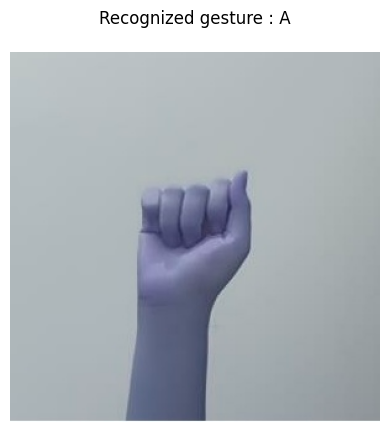

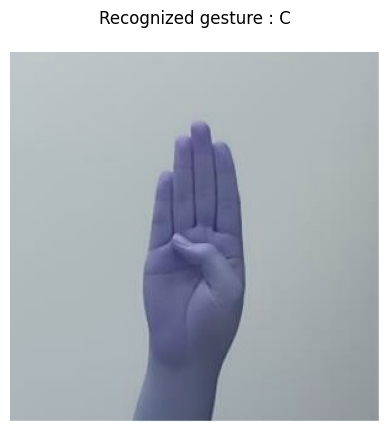

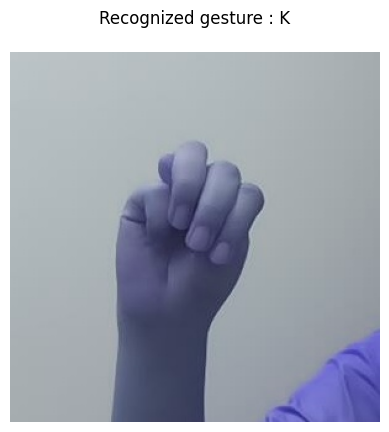

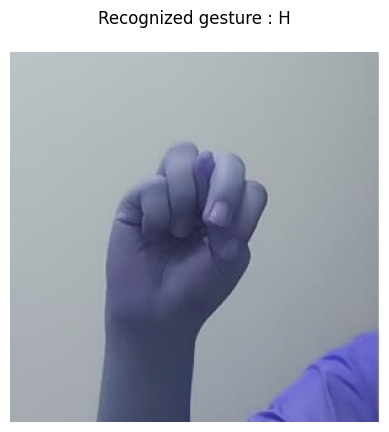

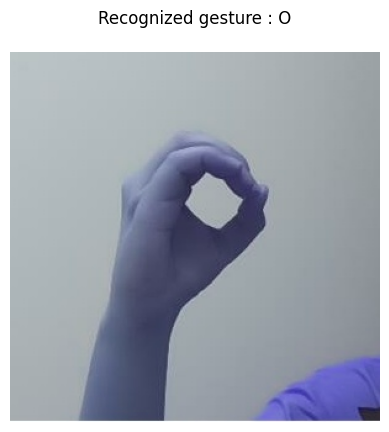

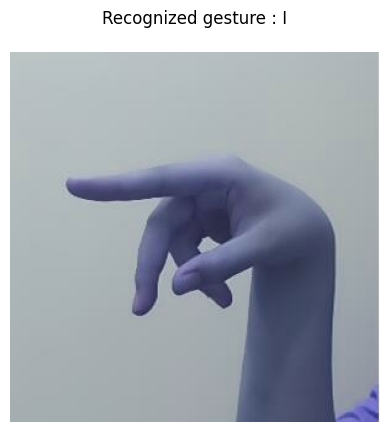

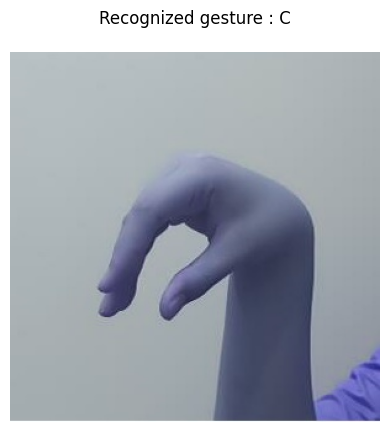

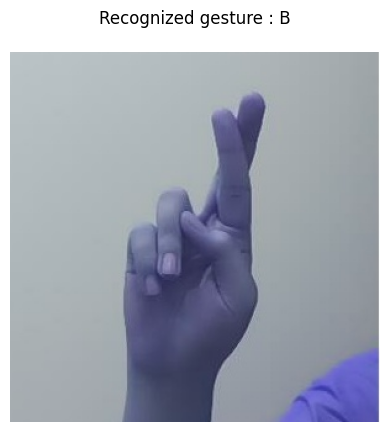

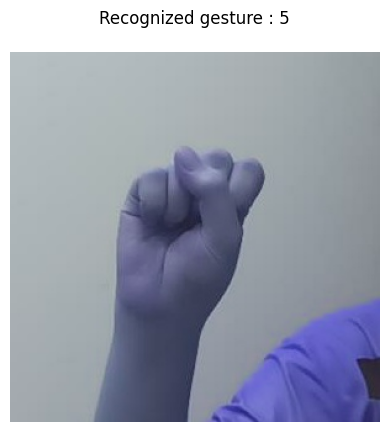

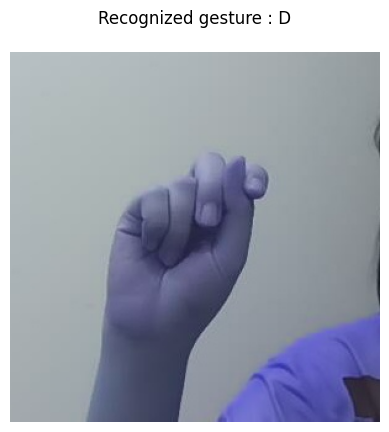

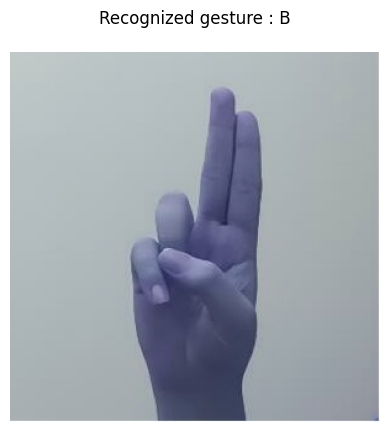

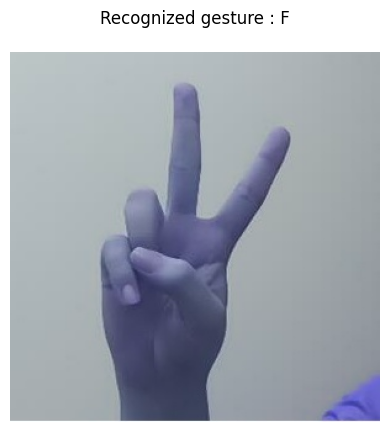

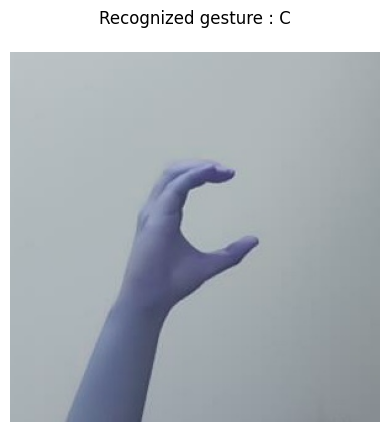

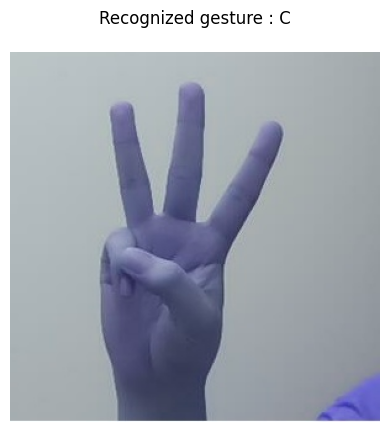

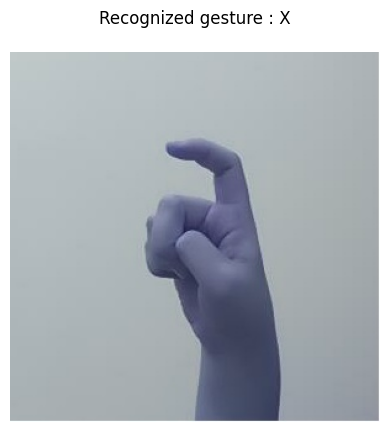

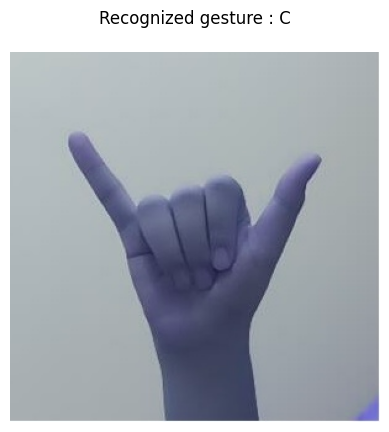

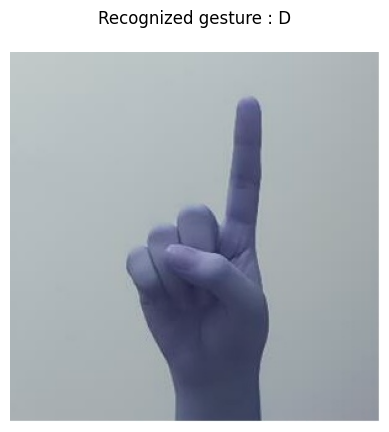

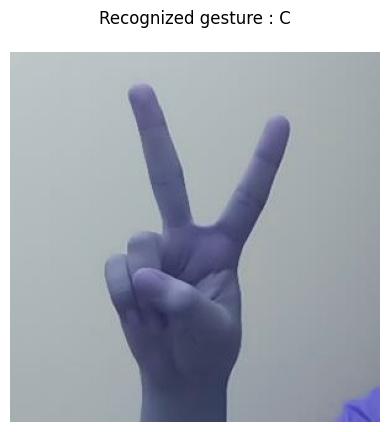

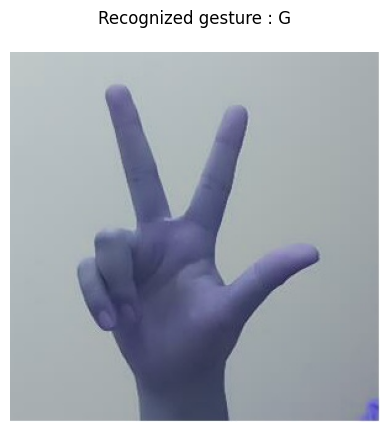

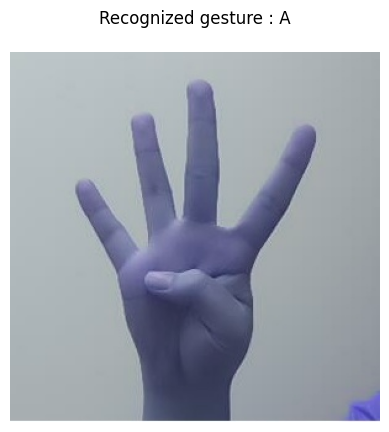

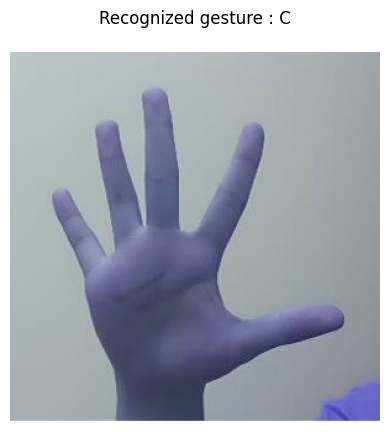

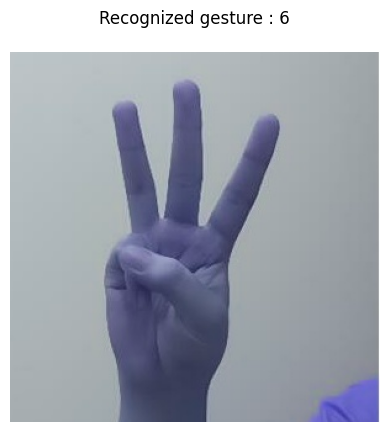

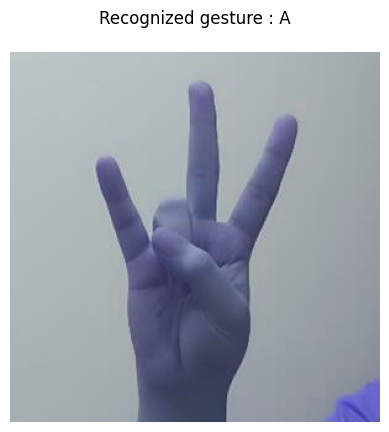

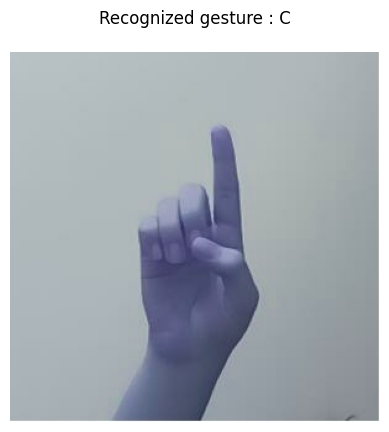

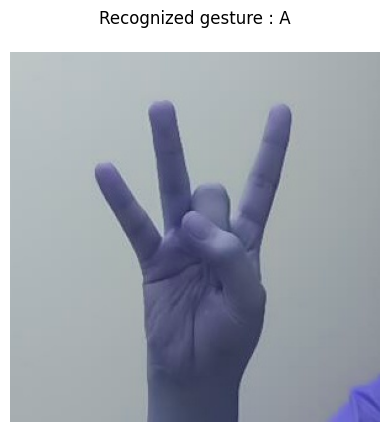

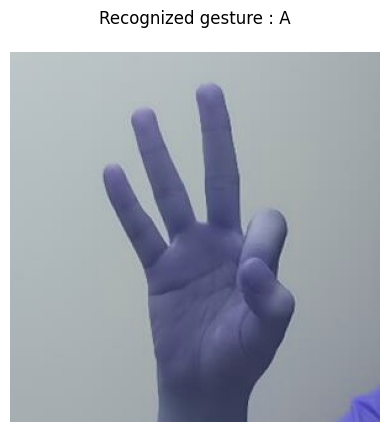

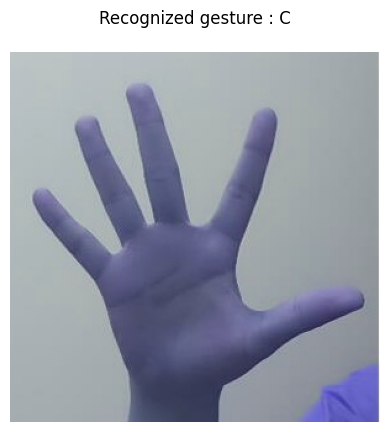

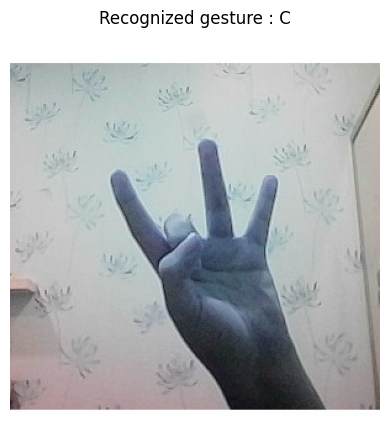

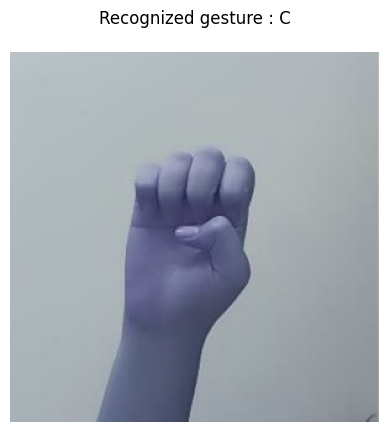

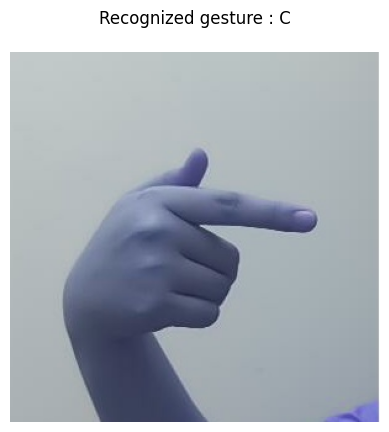

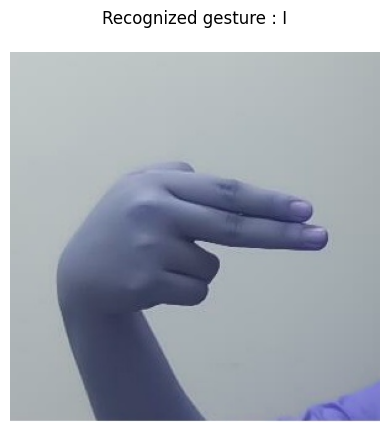

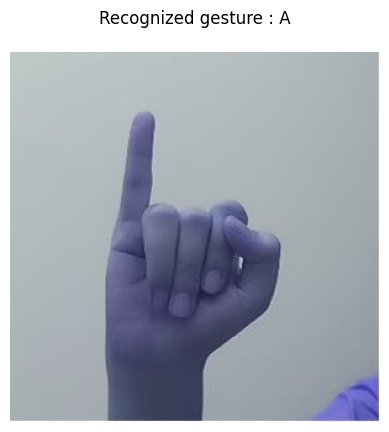

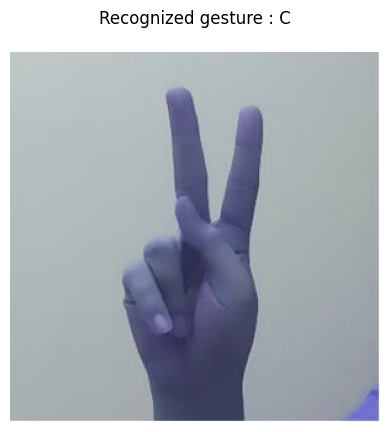

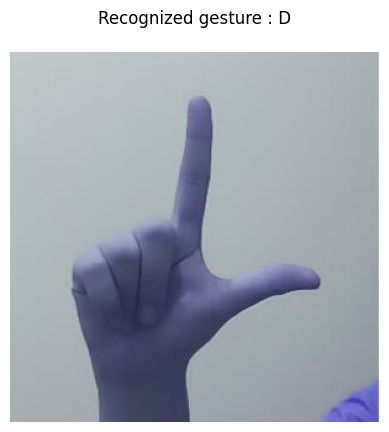

In [ ]:
# def recognize_gesture(img_path):
#     # keypoints, descriptors = orb.detectAndCompute(img, None)
#     target = cv2.imread(img_path)
#     target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
#     process_target = cv2.cvtColor(target, cv2.COLOR_RGB2GRAY)
#     process_target = cv2.medianBlur(process_target, 3)
#     process_target = cv2.equalizeHist(process_target)
#     keypoints, descriptors = sift.detectAndCompute(process_target, None)
#     descriptors = np.float32(descriptors)

#     if descriptors is not None:
#         predictions = knn.predict(descriptors)
#         gesture = np.bincount(predictions).argmax()  # Get the most common gesture prediction
#         return gesture
#     else:
#         return "No keypoints found"

# target_path = "./tes/"
# # recognized_gesture = recognize_gesture(target)
# # print(f"Recognized gesture: {recognized_gesture}")
# gesture_mapping = {0: 'A', 1: 'B', 2: 'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'K', 10:'L', 11:'M', 12:'N', 13:'O', 14:'P', 15:'Q', 16:'R', 17:'S', 18:'T', 19:'U', 20:'V', 21:'W', 22:"X", 23:'Y', 24:'1', 25:'2', 26:'3', 27:'4', 28:'5', 29:'6', 30:'7', 31:'8', 32: '9'}

# i = 1
# for ti_path in os.listdir(target_path):
#     this_path = str(target_path + ti_path + '/300.jpg')
#     recognized_gesture = recognize_gesture(this_path)
#     target_img = cv2.imread(this_path)
#     plt.imshow(target_img)
#     plt.title(f"Recognized gesture : {gesture_mapping[recognized_gesture]}\n")
#     plt.axis('off')
#     # plt.figure(figsize=(3,4))
#     plt.savefig(str(i) + '.png')
#     plt.show()
#     i += 1
    


# # target_img = cv2.imread(target)
# # plt.imshow(target_img)
# # plt.title(f"Recognized gesture : {gesture_mapping[recognized_gesture]}")
# # plt.axis('off')
# # plt.show()


In [51]:
# def show_image_with_label(image_path, label):
#     img = cv2.imread(image_path, 0)  # Load image in grayscale
#     plt.imshow(img, cmap='gray')
#     plt.title(f"Label: {label}")
#     plt.axis('off')
#     plt.show()

# # Example: Show 5 images from each gesture class
# for gesture_folder in os.listdir(path):
#     folder_path = path + gesture_folder
#     print(f"Showing images for Gesture Class {gesture_folder}:")

#     for i, img_file in enumerate(os.listdir(folder_path)):
#         if i >= 5:  # Show only 5 images per gesture class
#             break
#         img_path = os.path.join(folder_path, img_file)
#         show_image_with_label(img_path, gesture_folder)


In [49]:
# target = cv2.imread("./tes/1/300.jpg")
# target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
# process_target = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
# process_target = cv2.medianBlur(process_target, 3)
# process_target = cv2.equalizeHist(process_target)

# target_keypoint, target_descriptor = sift.detectAndCompute(process_target, None)
# target_descriptor = np.float32(target_descriptor)

In [52]:
# for gesture_folder in os.listdir(path):
#     folder_path = path + gesture_folder
#     num_images = len(os.listdir(folder_path))
#     print(f"Gesture {gesture_folder}: {num_images} images")